In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

--2024-03-30 03:29:37--  http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz             [               <=>  ] 879.65M   413KB/s    in 31m 48s 

2024-03-30 04:01:25 (472 KB/s) - ‘SUSY.csv.gz’ saved [922377711]



In [2]:
!gunzip SUSY.csv.gz

In [1]:
ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Mar 28 23:00 sample_data/
-rw-r--r-- 1 root root 2.3G Mar 30 04:01 SUSY.csv


In [2]:
filename="SUSY.csv"
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [3]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [4]:
FeatureNames

['R',
 'M_R',
 'S_R',
 'MET_rel',
 'axial_MET',
 'dPhi_r_b',
 'cos_theta_r1',
 'M_TR_2',
 'M_Delta_R',
 'MT2']

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [7]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

l_1_pT


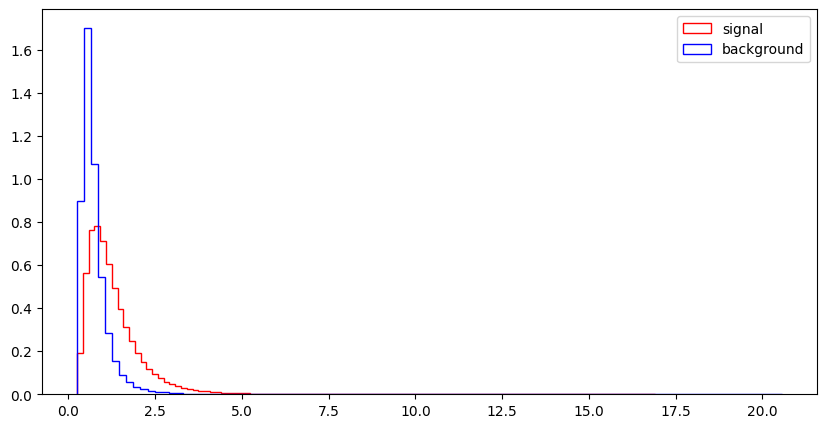

l_1_eta


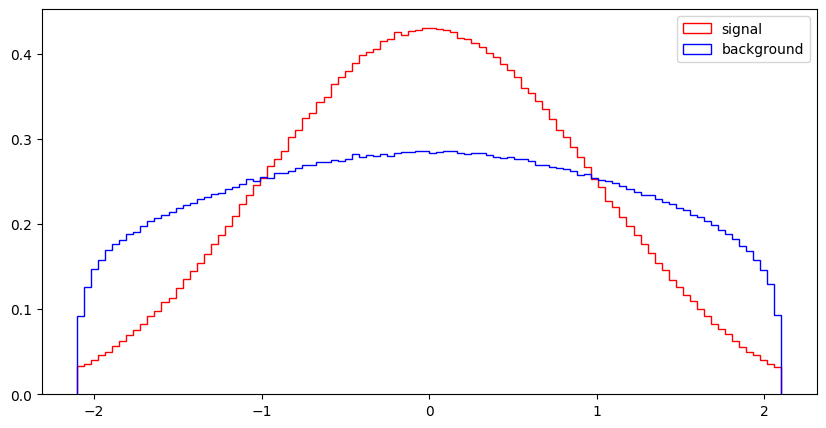

l_1_phi


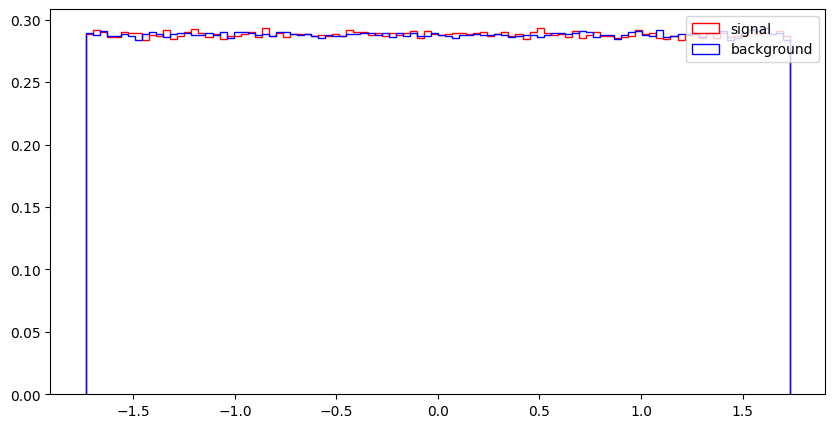

l_2_pT


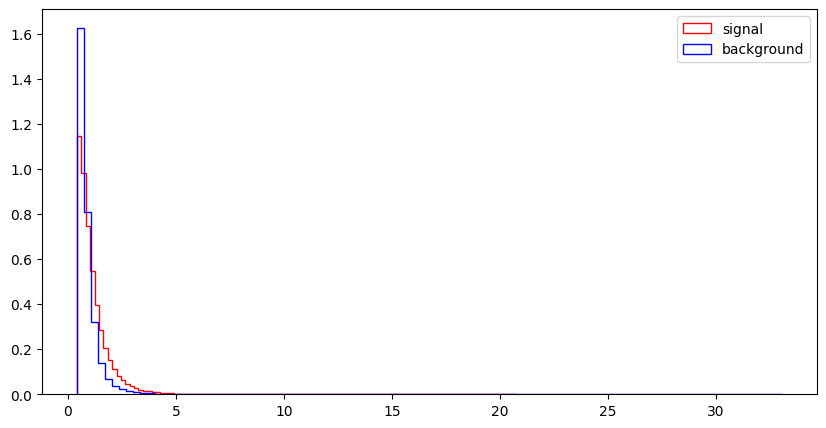

l_2_eta


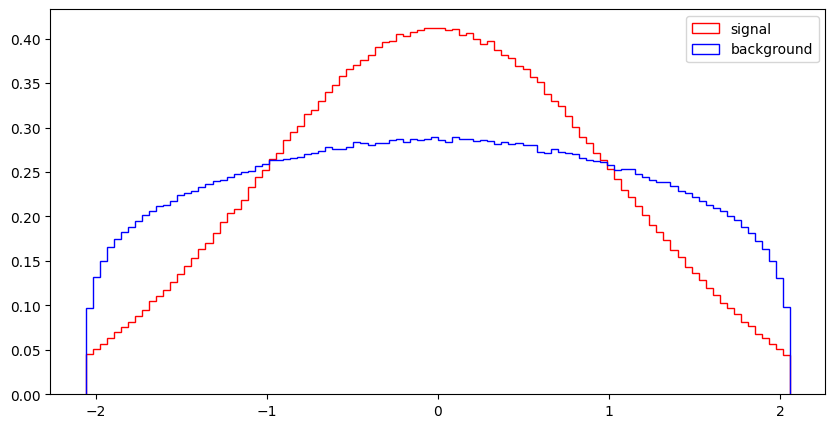

l_2_phi


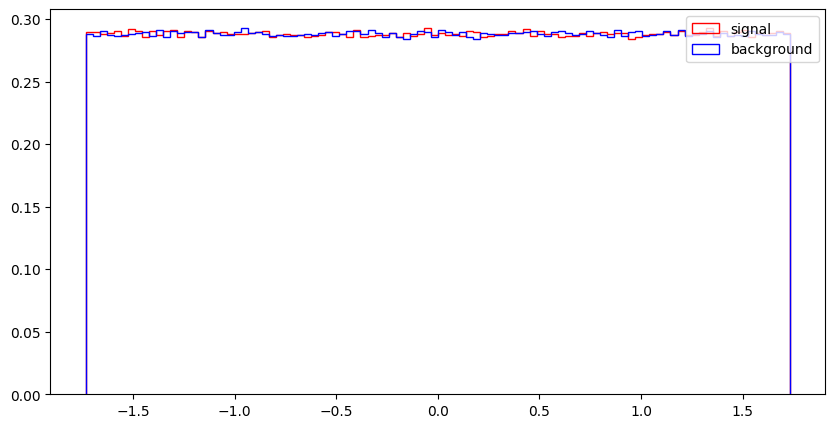

MET


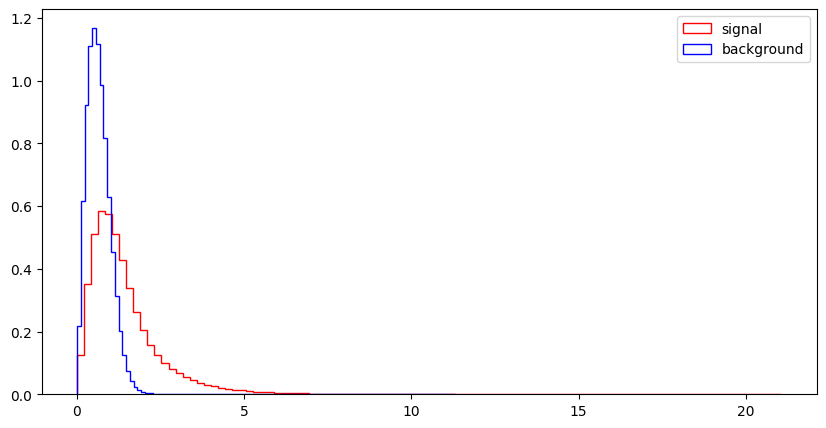

MET_phi


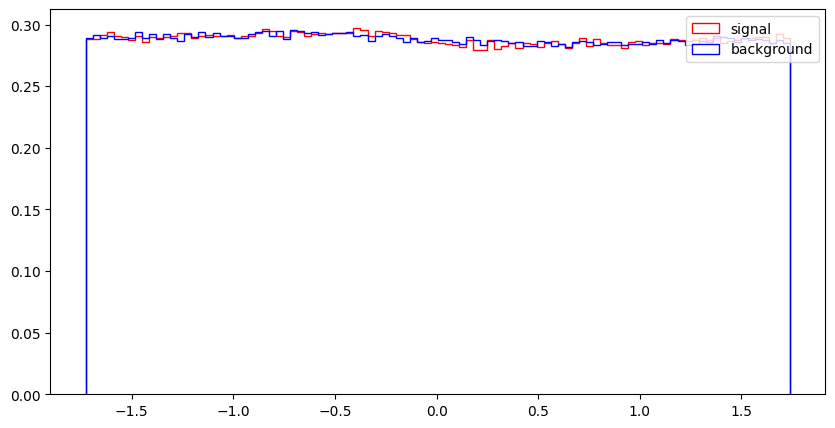

MET_rel


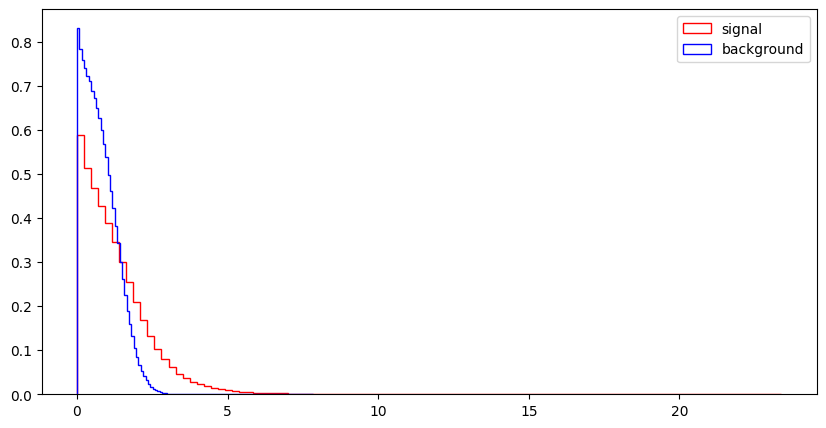

axial_MET


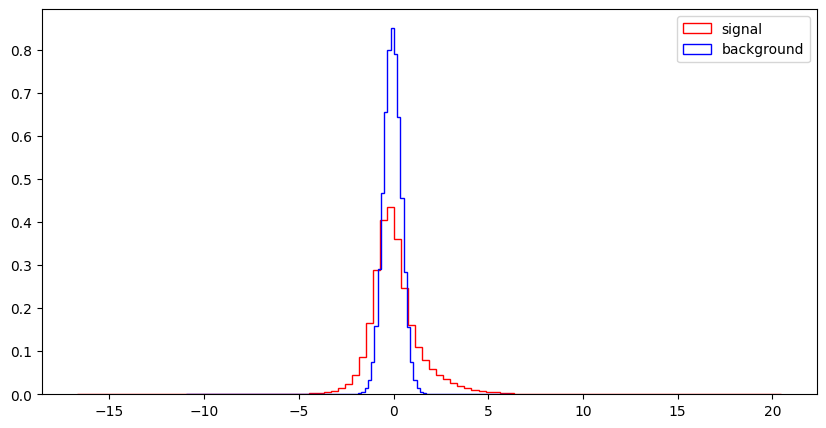

M_R


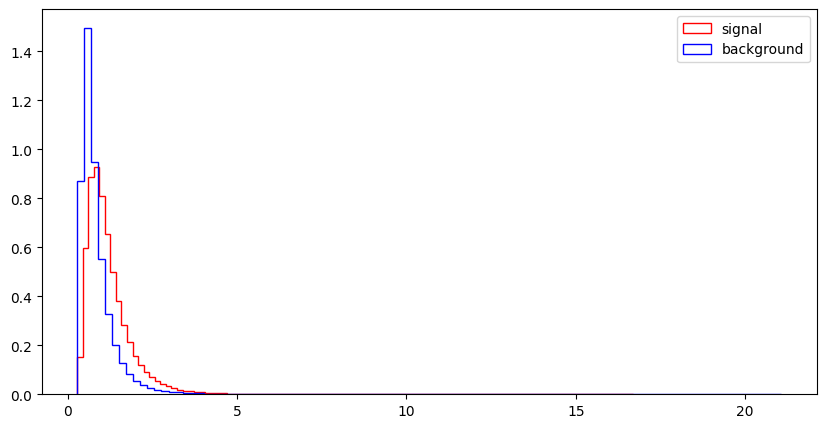

M_TR_2


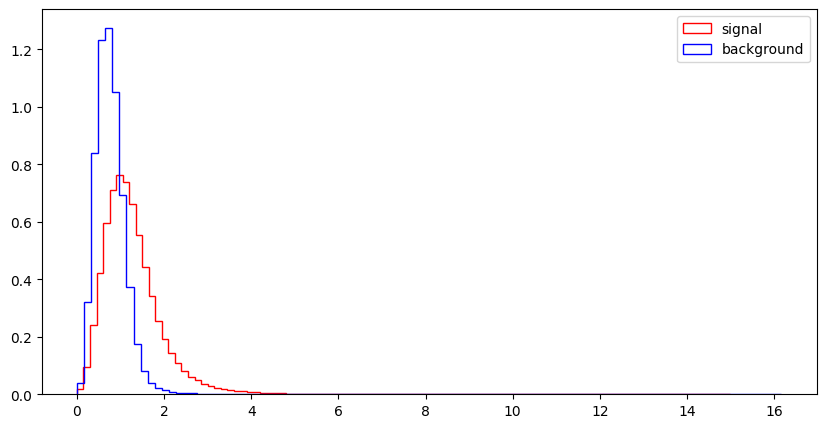

R


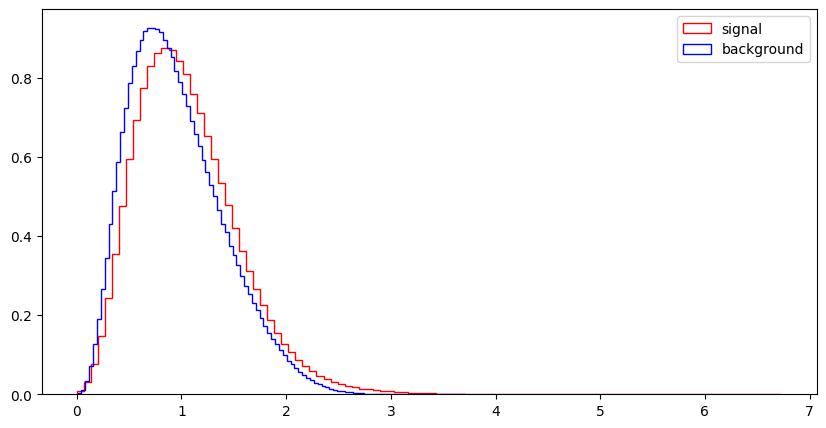

MT2


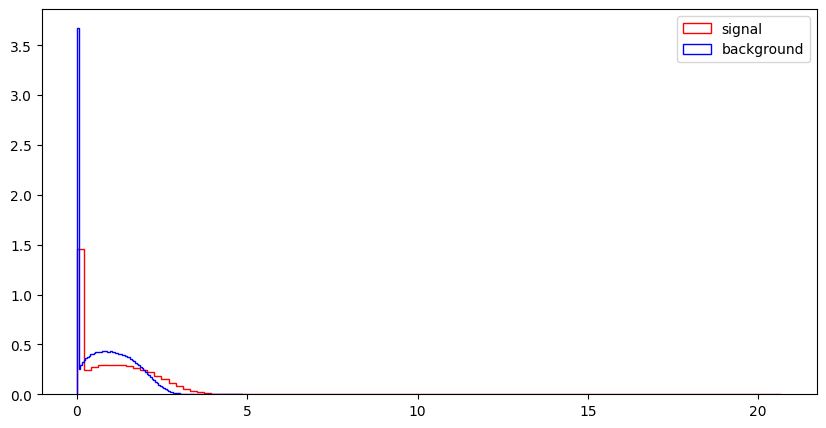

S_R


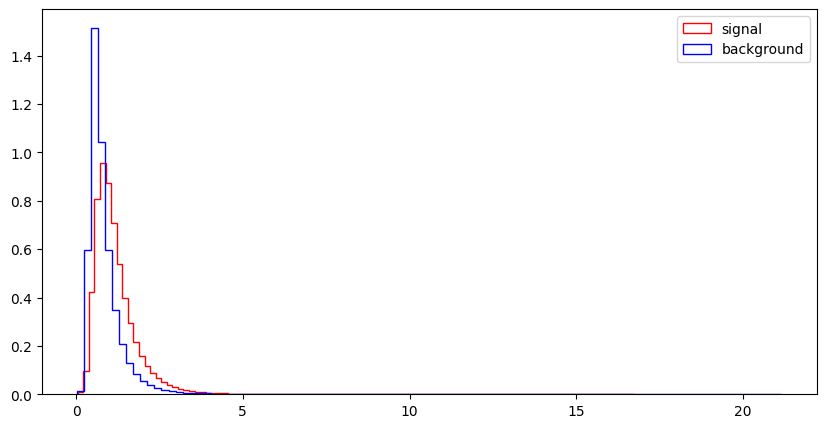

M_Delta_R


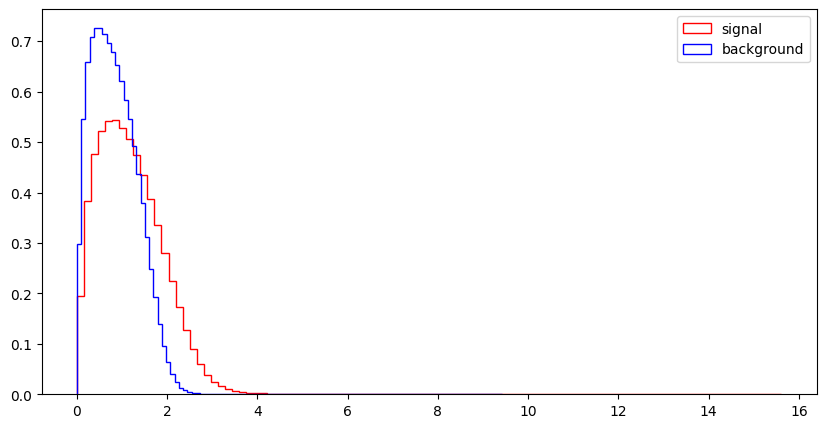

dPhi_r_b


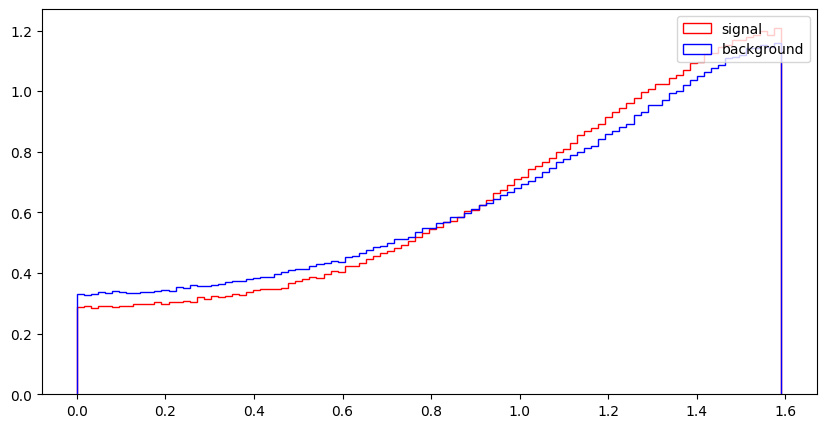

cos_theta_r1


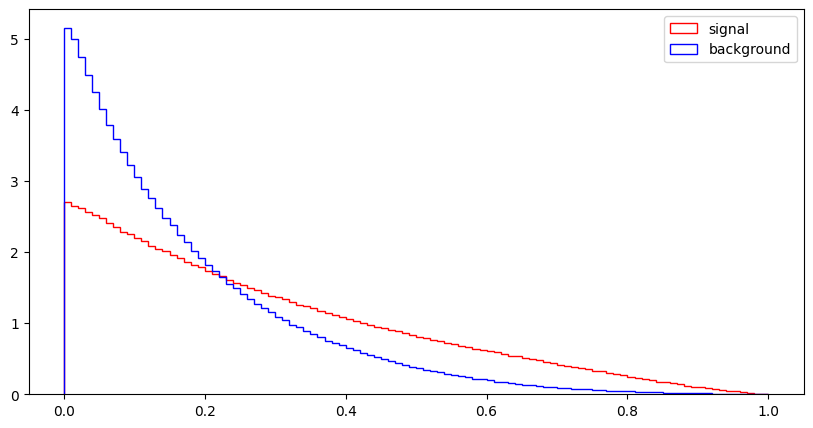

In [11]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

Text(0, 0.5, 'l_1_pT')

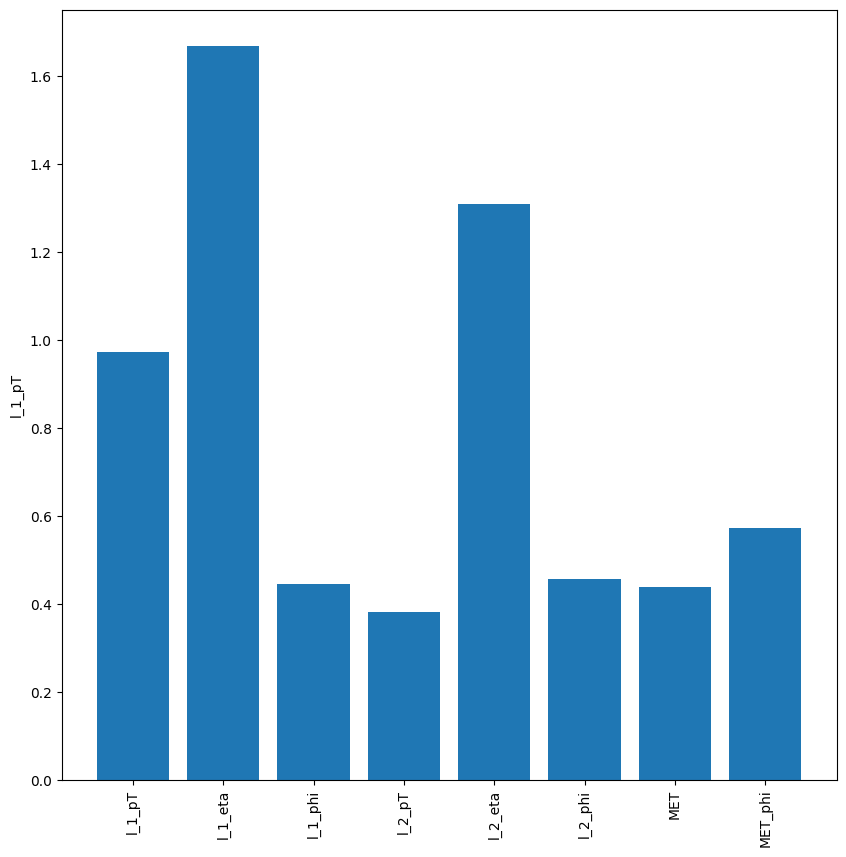

In [12]:
low_level_labels = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
high_level_labels = ['MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'] #separated column names into low and high levels

fig, ax = plt.subplots(1, 1, figsize=(10, 10)) #subplot with figure size set to 10,10

ax.bar(range(8), df[df.columns[1]][0:8])
ax.set_xticks(range(8))
ax.set_xticklabels(low_level_labels, rotation='vertical', fontsize=10)
ax.set_ylabel(df.columns[1])


Text(0, 0.5, 'l_1_pT')

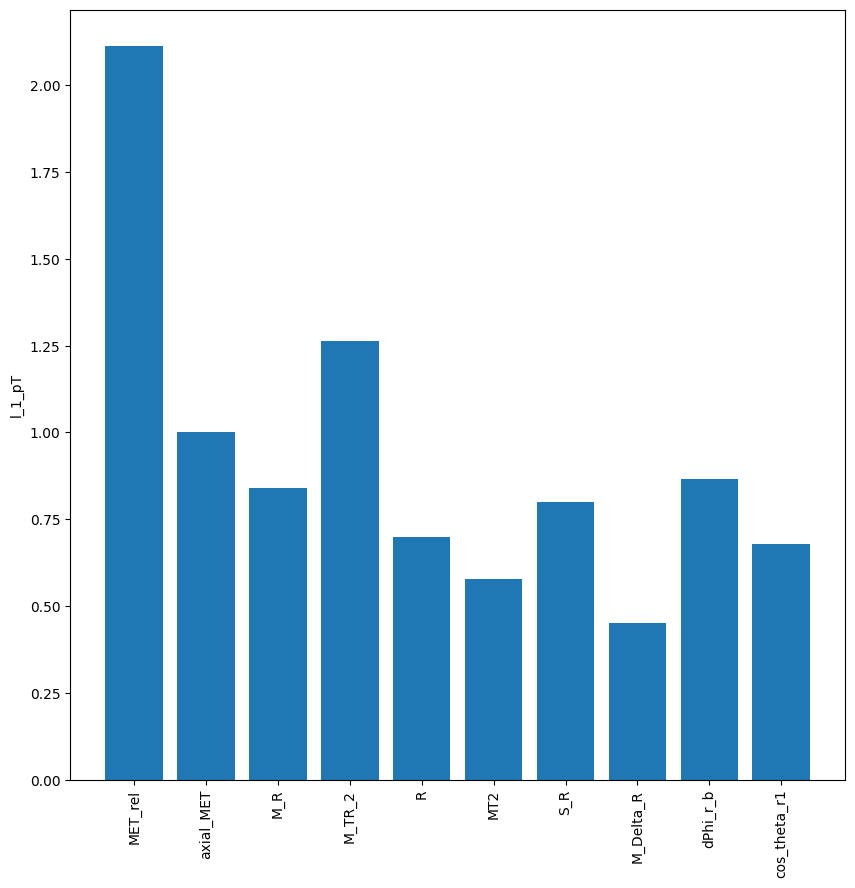

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.bar(range(10), df[df.columns[1]][8:18])
ax.set_xticks(range(10))
ax.set_xticklabels(high_level_labels, rotation='vertical', fontsize=10)
ax.set_ylabel(df.columns[1])


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def makepairplots(df, labels):
    num_features = len(labels)#number of features

    fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))#creates figure and array of subplots

    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i in range(num_features):
        for j in range(num_features):#loop per column
            if i == j:#on diagonal
                axes[i, j].hist(df[df.columns[i]], bins=30, color='skyblue', edgecolor='black')#plots histogram of column val
                axes[i, j].set_xlabel(labels[i])
                axes[i, j].set_ylabel('Frequency')
            else:#nondiagonal scatterplot
                axes[i, j].scatter(df[df.columns[j]], df[df.columns[i]], s=1, alpha=0.5, color='orange') #plots scatterplot to value of 2 columns
                axes[i, j].set_xlabel(labels[j]) #sets x axis label to feature name
                axes[i, j].set_ylabel(labels[i])

    plt.tight_layout() #this changes subplot paramters
    plt.show()

labels = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi',
          'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'] #labels for the features




In [9]:
makespairplots(df, labels)
#tried to run this and "session crashed after using all available RAM"

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x79a6c7228280> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#don't know how to make this run faster since it doesn't run at all

In [ ]:
#as far as observables go i can't figure it out since it wont run

In [13]:
from IPython.display import HTML, display
import tabulate

In [19]:
#4.2.2
import numpy as np

all = np.random.rand(100, 10)  # 100 samples, 10 observables
low_high_features = np.random.rand(100, 5)  # 100 samples, 5 low-level features and 5 high-level features

covariance_all = np.cov(all, rowvar=False)#covariance and correlation matrices
correlation_all = np.corrcoef(all, rowvar=False)

low_features = low_high_features[:, :5]  # takes low-level features
high_features = low_high_features[:, 5:]

covariance_low = np.cov(low_features, rowvar=False) #computes covariance and correlation coefficient matrixs with the feature(low_features in this case)
correlation_low = np.corrcoef(low_features, rowvar=False)#rowvar is the argument that distinguishes between row and column so in this each volumn represents a variable, and if it was true it would be viceversa

covariance_high = np.cov(high_features, rowvar=False)
correlation_high = np.corrcoef(high_features, rowvar=False)


print("Covariance matrix for all observables:")#prints matrices
print(covariance_all)
print("\nCorrelation matrix for all observables:")
print(correlation_all)

print("\nCovariance matrix for low-level features:")
print(covariance_low)
print("\nCorrelation matrix for low-level features:")
print(correlation_low)

print("\nCovariance matrix for high-level features:")
print(covariance_high)
print("\nCorrelation matrix for high-level features:")
print(correlation_high)


Covariance matrix for all observables:
[[ 0.08469659  0.01196607  0.00252939 -0.01160059  0.00468522  0.00374874
   0.01660509  0.0108433   0.00134604  0.00028744]
 [ 0.01196607  0.08581347  0.00739688  0.01217437 -0.00103154  0.00084888
   0.00441411 -0.00136206  0.00979531  0.0042584 ]
 [ 0.00252939  0.00739688  0.08349413 -0.00409494 -0.00253645  0.00258271
  -0.00649496  0.01316204  0.0075742   0.00377076]
 [-0.01160059  0.01217437 -0.00409494  0.07842982  0.00064001 -0.0051285
   0.00573935 -0.00819277  0.00432461  0.00731707]
 [ 0.00468522 -0.00103154 -0.00253645  0.00064001  0.07424163  0.00226116
   0.00487632 -0.0019647   0.00660158  0.00314328]
 [ 0.00374874  0.00084888  0.00258271 -0.0051285   0.00226116  0.07327075
  -0.00284417 -0.00778933 -0.0065829   0.00253518]
 [ 0.01660509  0.00441411 -0.00649496  0.00573935  0.00487632 -0.00284417
   0.07871923 -0.00408559 -0.00511622  0.01004255]
 [ 0.0108433  -0.00136206  0.01316204 -0.00819277 -0.0019647  -0.00778933
  -0.00408559

In [18]:
import numpy as np
from tabulate import tabulate
#import libraries



covariance_all = np.cov(all, rowvar=False)
correlation_all = np.corrcoef(all, rowvar=False)
covariance_low = np.cov(low_features, rowvar=False)
correlation_low = np.corrcoef(low_features, rowvar=False)
covariance_high = np.cov(high_features, rowvar=False)
correlation_high = np.corrcoef(high_features, rowvar=False)

#copied from above, those were the coorelation and covariance matrices


headers = ["Feature"] + [f"Feature {i+1}" for i in range(len(all))]#creates header per feature for the amount of features in the data
table_cov_all = tabulate(covariance_all, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")#table for covariance
table_corr_all = tabulate(correlation_all, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")#correlation table formats the values in the table with three decimal places and specific format fancy grid
table_cov_low = tabulate(covariance_low, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")
table_corr_low = tabulate(correlation_low, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")#low level feature table
table_cov_high = tabulate(covariance_high, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")#high level feature table
table_corr_high = tabulate(correlation_high, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")#high level correlation

print("Covariance Matrix of All Observables:")#all of these embed them into the notebook with nic headings
print(table_cov_all)
print("\nCorrelation Matrix of All Observables:")
print(table_corr_all)

print("\nCovariance Matrix of Low-level Features:")
print(table_cov_low)
print("\nCorrelation Matrix of Low-level Features:")
print(table_corr_low)

print("\nCovariance Matrix of High-level Features:")
print(table_cov_high)
print("\nCorrelation Matrix of High-level Features:")
print(table_corr_high)


Covariance Matrix of All Observables:
╒═══════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│   Feature │   Feature 1 │   Feature 2 │   Feature 3 │   Feature 4 │   Feature 5 │   Feature 6 │   Feature 7 │   Feature 8 │   Feature 9 │
╞═══════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│     0.079 │       0.009 │      -0.005 │       0.015 │       0.001 │      -0.013 │       0.007 │      -0.003 │       0.009 │       0.012 │
├───────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│     0.009 │       0.083 │       0.014 │       0.001 │       0.002 │       0.010 │       0.005 │      -0.012 │      -0.002 │       0.016 │
├───────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼───────────